In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Resources/Gasoline_Prices.csv")
df

,Date,New York State Average ($/gal),Albany Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal)
0,05/29/2023,3.69,3.70,3.70,3.68,3.60,3.71,3.73,3.69,3.70
1,05/22/2023,3.66,3.68,3.70,3.68,3.55,3.66,3.72,3.68,3.68
2,05/15/2023,3.67,3.69,3.71,3.69,3.57,3.67,3.73,3.70,3.69
3,05/08/2023,3.70,3.72,3.73,3.71,3.61,3.70,3.74,3.71,3.71
4,05/01/2023,3.71,3.74,3.72,3.70,3.63,3.70,3.73,3.70,3.71
...,...,...,...,...,...,...,...,...,...,...
809,11/26/2007,3.28,3.26,3.25,3.29,3.27,3.28,3.28,3.29,3.32
810,11/19/2007,3.26,3.24,3.23,3.27,3.25,3.26,3.26,3.28,3.31
811,11/12/2007,3.21,3.20,3.18,3.21,3.18,3.18,3.20,3.22,3.25
812,11/05/2007,3.10,3.09,3.08,3.09,3.06,3.07,3.09,3.10,3.12


In [3]:
# Check for missing values
df.isnull().sum()

Date                              0
New York State Average ($/gal)    0
Albany Average ($/gal)            0
Binghamton Average ($/gal)        0
Buffalo Average ($/gal)           0
Nassau Average ($/gal)            0
New York City Average ($/gal)     0
Rochester Average ($/gal)         0
Syracuse Average ($/gal)          0
Utica Average ($/gal)             0
dtype: int64

In [4]:
# Check for duplicated rows
df.duplicated().sum()

0

In [5]:
# Check the data types of the data in the dataset
df.dtypes

Date                               object
New York State Average ($/gal)    float64
Albany Average ($/gal)            float64
Binghamton Average ($/gal)        float64
Buffalo Average ($/gal)           float64
Nassau Average ($/gal)            float64
New York City Average ($/gal)     float64
Rochester Average ($/gal)         float64
Syracuse Average ($/gal)          float64
Utica Average ($/gal)             float64
dtype: object

In [6]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

In [7]:
# Calculate summary statistics for numerical columns
df.describe()

,New York State Average ($/gal),Albany Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal)
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,3.123342,3.055221,3.073096,3.098428,3.120774,3.202764,3.089459,3.044754,3.106904
std,0.653527,0.657078,0.654812,0.653366,0.659759,0.651510,0.657365,0.666342,0.660268
min,1.830000,1.780000,1.710000,1.850000,1.820000,1.900000,1.800000,1.760000,1.810000
25%,2.600000,2.530000,2.542500,2.570000,2.580000,2.670000,2.560000,2.492500,2.580000
50%,2.980000,2.890000,2.930000,2.975000,2.995000,3.070000,2.940000,2.915000,2.950000
75%,3.710000,3.630000,3.667500,3.700000,3.710000,3.780000,3.687500,3.627500,3.700000
max,5.030000,4.970000,4.970000,4.900000,5.030000,5.180000,4.980000,4.970000,5.000000


In [8]:
# Find the maximum value and corresponding date for each column
max_values = df.max()
max_dates = df.idxmax()

# Find the minimum value and corresponding date for each column
min_values = df.min()
min_dates = df.idxmin()

# Combine the results into a new DataFrame
result_df = pd.DataFrame({
    'Max Value': max_values,
    'Max Date': max_dates,
    'Min Value': min_values,
    'Min Date': min_dates
})

# Print the result
result_df

,Max Value,Max Date,Min Value,Min Date
New York State Average ($/gal),5.03,2022-06-20,1.83,2009-01-05
Albany Average ($/gal),4.97,2022-06-20,1.78,2009-01-05
Binghamton Average ($/gal),4.97,2022-06-20,1.71,2009-01-05
Buffalo Average ($/gal),4.90,2022-06-20,1.85,2009-01-05
Nassau Average ($/gal),5.03,2022-06-20,1.82,2009-01-05
New York City Average ($/gal),5.18,2022-06-20,1.90,2009-01-05
Rochester Average ($/gal),4.98,2022-06-20,1.80,2009-01-05
Syracuse Average ($/gal),4.97,2022-06-20,1.76,2009-01-05
Utica Average ($/gal),5.00,2022-06-20,1.81,2009-01-05


In [9]:
# Resample the data to a different time frequency (e.g., monthly or yearly averages)
df_monthly = df.resample('M').mean()

df_yearly = df.resample('Y').mean()

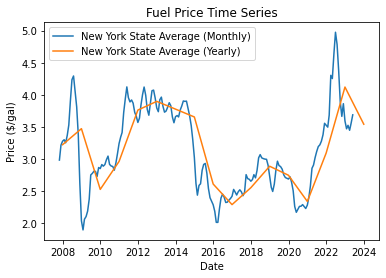

In [10]:
plt.plot(df_monthly['New York State Average ($/gal)'], label='New York State Average (Monthly)')
plt.plot(df_yearly['New York State Average ($/gal)'], label='New York State Average (Yearly)')
# Add other lines for different locations if needed
plt.xlabel('Date')
plt.ylabel('Price ($/gal)')
plt.title('Fuel Price Time Series')
plt.legend()

# Save the figure.
plt.savefig("./Images/FuelPriceTimeSeries.jpg")

plt.show()

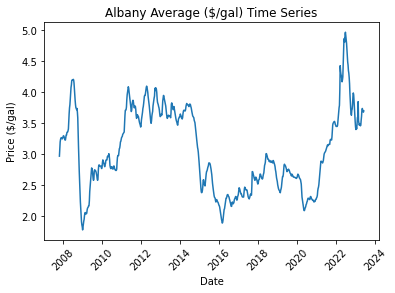

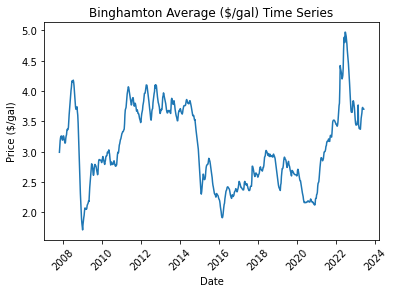

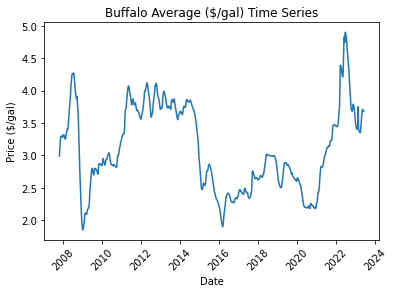

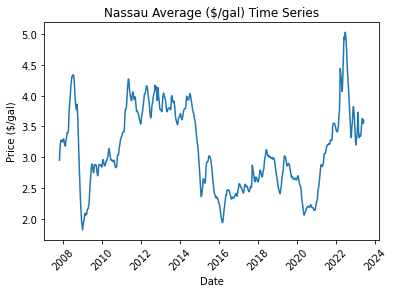

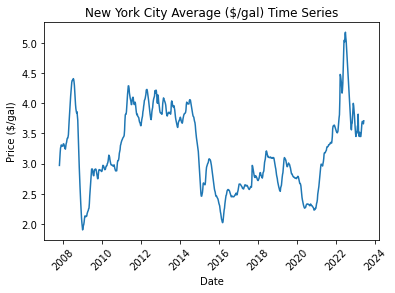

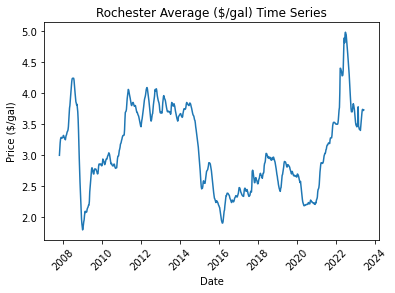

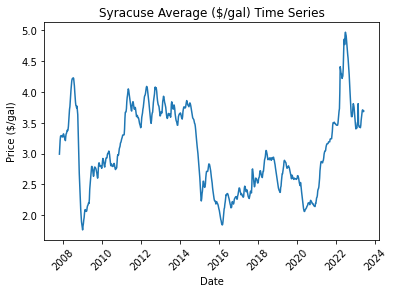

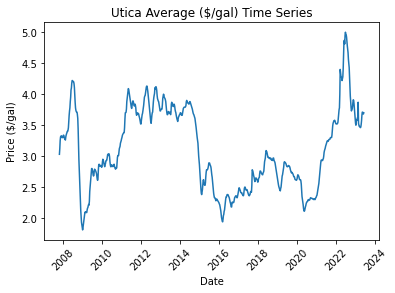

In [11]:
# Iterate through each column (excluding the 'Date' column)
for column in df.columns[1:]:
    plt.figure()  # Create a new figure for each column
    plt.plot(df.index, df[column])
    plt.xlabel('Date')
    plt.ylabel('Price ($/gal)')
    plt.title(f'{column} Time Series')
    plt.xticks(rotation=45)
    
    # Save the figure.
    # plt.savefig(f"./Images/{column}TimeSeries.jpg")
    
    plt.show()

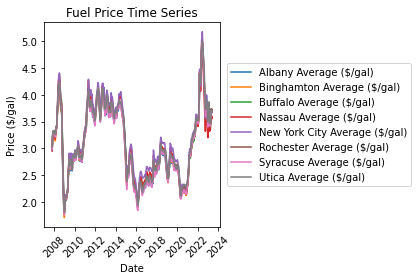

In [12]:
# Iterate through each column (excluding the 'Date' column)
for column in df.columns[1:]:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Price ($/gal)')
plt.title('Fuel Price Time Series')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
plt.tight_layout()  # Ensures the legend does not overlap with the plot

# Save the figure.
plt.savefig("./Images/FuelPricesOverlayed.jpg")

plt.show()

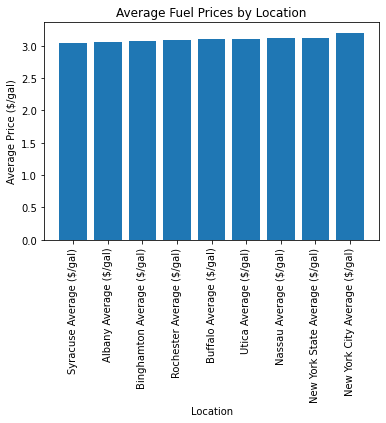

In [13]:
# Calculate the average price across all dates for each location
avg_prices = df.mean()

# Sort the locations by average price in ascending order
sorted_locations = avg_prices.sort_values()

# Plot a bar chart of average prices for each location
plt.bar(sorted_locations.index, sorted_locations)
plt.xlabel('Location')
plt.ylabel('Average Price ($/gal)')
plt.title('Average Fuel Prices by Location')
plt.xticks(rotation=90)

# Save the figure.
plt.savefig("./Images/AvgFuelPriceLocation.jpg")

plt.show()

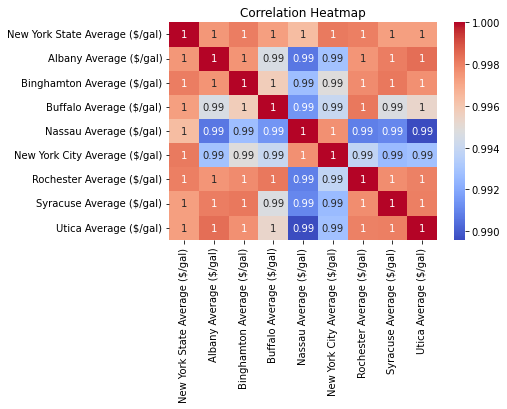

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Save the figure.
plt.savefig("./Images/CorrelationHeatmap.jpg")

plt.show()

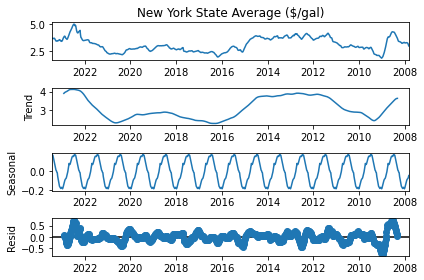

In [15]:
# Perform seasonal decomposition on a specific column (e.g., 'New York State Average ($/gal)')
column_name = 'New York State Average ($/gal)'
decomposition = seasonal_decompose(df[column_name], model='additive')

# Plot the decomposition components
decomposition.plot()

# Save the figure.
plt.savefig("./Images/decomposition.jpg")

plt.show()

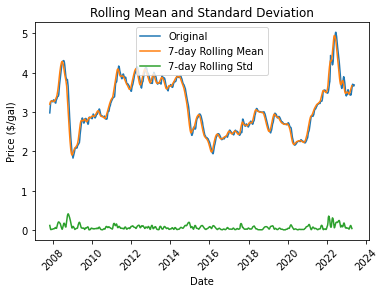

In [16]:
# Calculate the rolling mean and standard deviation for a specific column
window_size = 7  # Specify the window size
rolling_mean = df['New York State Average ($/gal)'].rolling(window_size).mean()
rolling_std = df['New York State Average ($/gal)'].rolling(window_size).std()

# Plot the original data and rolling statistics
plt.plot(df.index, df['New York State Average ($/gal)'], label='Original')
plt.plot(df.index, rolling_mean, label=f'{window_size}-day Rolling Mean')
plt.plot(df.index, rolling_std, label=f'{window_size}-day Rolling Std')
plt.xlabel('Date')
plt.ylabel('Price ($/gal)')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/RollingMeandSTD.jpg")

plt.show()

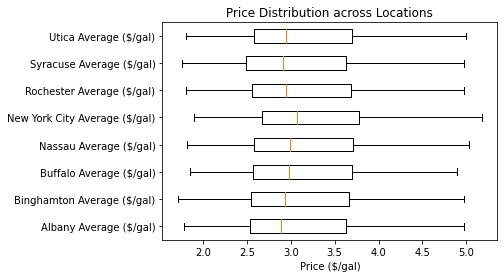

In [17]:
# Create a boxplot to compare the distribution of prices across all locations
plt.boxplot(df.iloc[:, 1:].values, labels=df.columns[1:], vert=False)
plt.xlabel('Price ($/gal)')
plt.title('Price Distribution across Locations')

# Save the figure.
plt.savefig("./Images/FuelDistributionLocations.jpg")

plt.show()

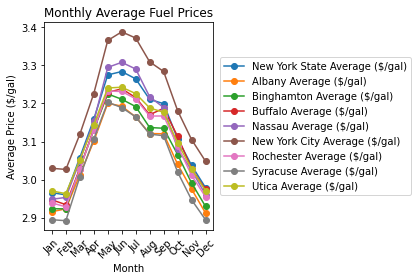

In [18]:
# Calculate the monthly average prices for each location
df['Month'] = df.index.month
monthly_avg = df.groupby('Month').mean()

# Plot the monthly average prices for each location
monthly_avg.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price ($/gal)')
plt.title('Monthly Average Fuel Prices')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
plt.tight_layout()  # Ensures the legend does not overlap with the plot

# Save the figure.
plt.savefig("./Images/MonthlyAvgFuelPrices.jpg")

plt.show()

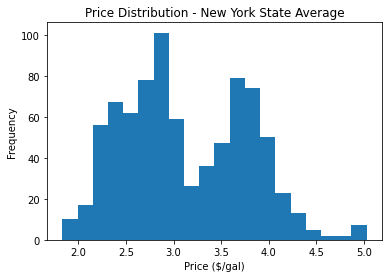

In [19]:
# Plot a histogram of the prices for a specific location (e.g., 'New York State Average ($/gal)')
column_name = 'New York State Average ($/gal)'
plt.hist(df[column_name], bins=20)
plt.xlabel('Price ($/gal)')
plt.ylabel('Frequency')
plt.title('Price Distribution - New York State Average')

# Save the figure.
plt.savefig("./Images/PriceDistribution.jpg")

plt.show()

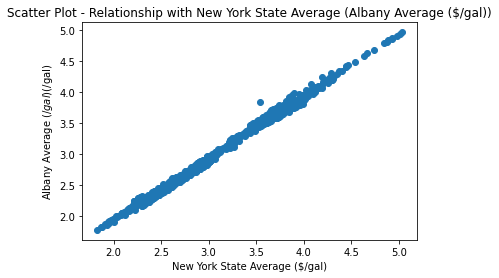

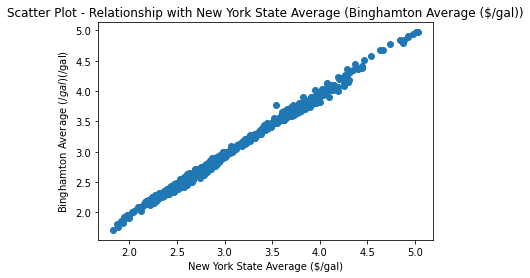

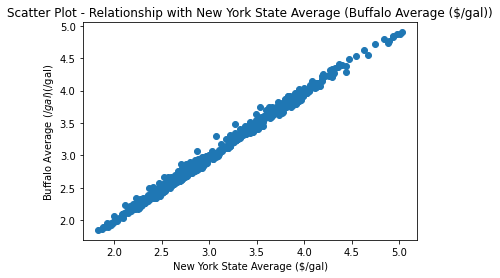

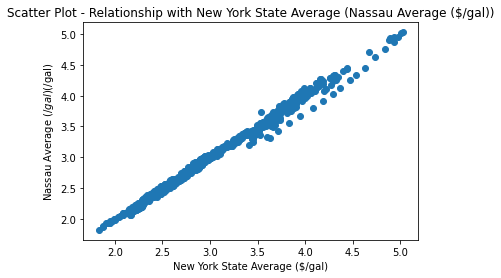

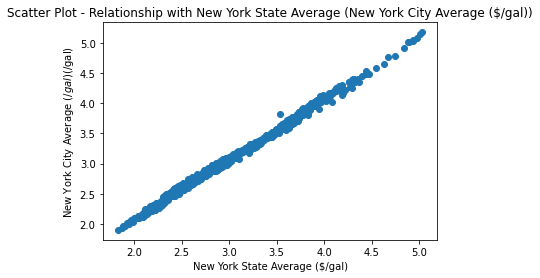

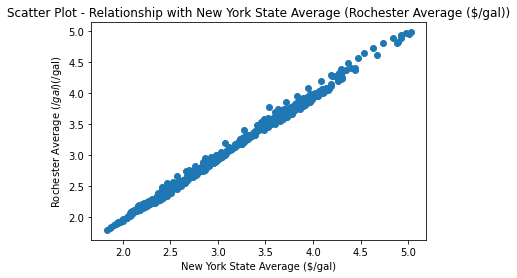

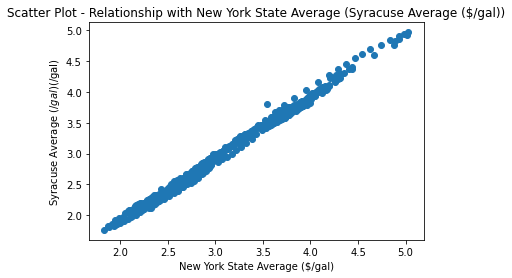

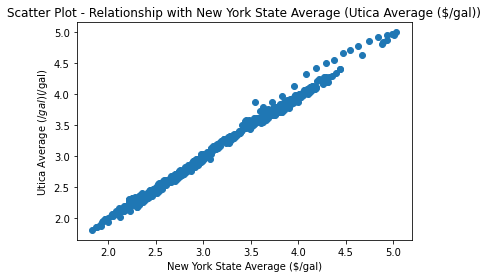

In [20]:
# Create a scatter plot to analyze the relationship between two locations (e.g., 'New York State Average ($/gal)' and 'Albany Average ($/gal)')

# Iterate through each column (excluding the 'Date' and 'Month' columns)
for column in df.columns[1:-1]:
    plt.figure()  # Create a new figure for each column
    plt.scatter(df['New York State Average ($/gal)'], df[column])
    plt.xlabel('New York State Average ($/gal)')
    plt.ylabel(f'{column} ($/gal)')
    plt.title(f'Scatter Plot - Relationship with New York State Average ({column})')
    plt.show()

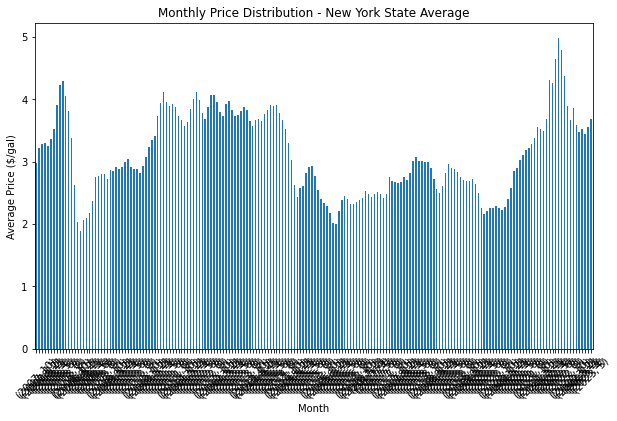

In [21]:
# Extract the month and year from the 'Date' column
# df['Month'] = df['Date'].dt.month
df['Year'] = df.index.year

# Group the data by month and calculate the average price
monthly_avg = df.groupby(['Year', 'Month']).mean()

# Plot the monthly price distribution for a specific location (e.g., 'New York State Average ($/gal)')
column_name = 'New York State Average ($/gal)'
monthly_avg[column_name].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Price ($/gal)')
plt.title('Monthly Price Distribution - New York State Average')
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/MonthlyPlotDistribution.jpg")

plt.show()

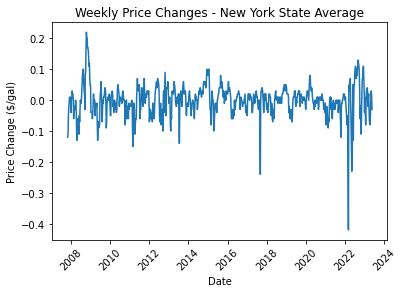

In [22]:
# Calculate the weekly price changes for a specific location (e.g., 'New York State Average ($/gal)')
column_name = 'New York State Average ($/gal)'
weekly_price_changes = df[column_name].diff()

# Plot the line chart of price changes
plt.plot(df.index, weekly_price_changes)
plt.xlabel('Date')
plt.ylabel('Price Change ($/gal)')
plt.title('Weekly Price Changes - New York State Average')
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/WeeklyPriceChange.jpg")

plt.show()

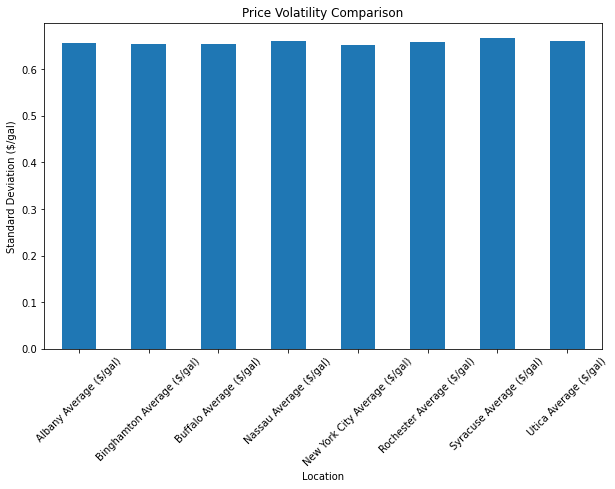

In [23]:
# Calculate the standard deviation as a measure of price volatility for each location
std_dev = df.iloc[:, 1:-2].std()

# Plot the bar chart of price volatility across locations
std_dev.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Standard Deviation ($/gal)')
plt.title('Price Volatility Comparison')
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/PriceVolatilityComparison.jpg")

plt.show()

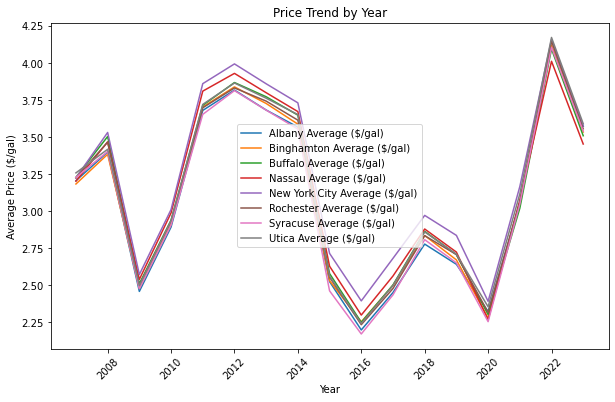

In [24]:
# Calculate the average price for each year and location
yearly_avg = df.groupby(['Year']).mean()

# Plot the price trend for each location by year
plt.figure(figsize=(10, 6))
for column in df.columns[1:-2]:
    plt.plot(yearly_avg.index, yearly_avg[column], label=column)

plt.xlabel('Year')
plt.ylabel('Average Price ($/gal)')
plt.title('Price Trend by Year')
plt.legend()
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/PriceTrendYear.jpg")

plt.show()

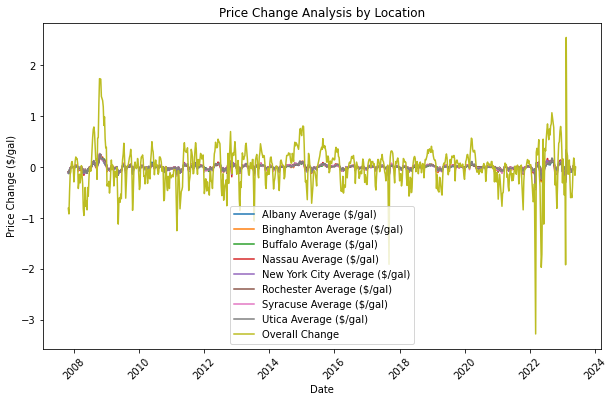

In [25]:
# Calculate the weekly price changes for each location
price_changes = df.iloc[:, 1:-2].diff()

# Calculate the overall price change by location
price_changes['Overall Change'] = price_changes.sum(axis=1)

# Plot the line chart of price changes by location
plt.figure(figsize=(10, 6))
for column in price_changes.columns:
    plt.plot(df.index, price_changes[column], label=column)

plt.xlabel('Date')
plt.ylabel('Price Change ($/gal)')
plt.title('Price Change Analysis by Location')
plt.legend()
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/PriceChangeLocation.jpg")

plt.show()

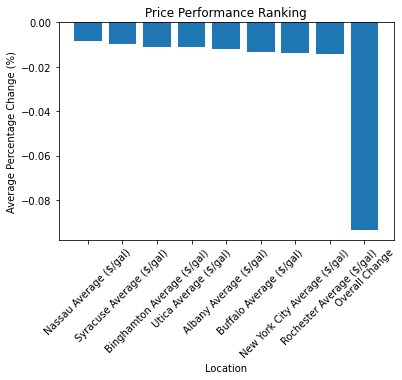

In [26]:
# Calculate the percentage change in price for each location
price_changes_pct = df.iloc[:, 1:-2].pct_change() * 100

# Calculate the overall percentage change for each location
price_changes_pct['Overall Change'] = price_changes_pct.sum(axis=1)

# Calculate the average percentage change for each location
avg_changes_pct = price_changes_pct.mean()

# Sort the locations based on average percentage change
sorted_locations = avg_changes_pct.sort_values(ascending=False)

# Plot the bar chart of price performance ranking
plt.bar(sorted_locations.index, sorted_locations)
plt.xlabel('Location')
plt.ylabel('Average Percentage Change (%)')
plt.title('Price Performance Ranking')
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/PricePerformanceRanking.jpg")

plt.show()

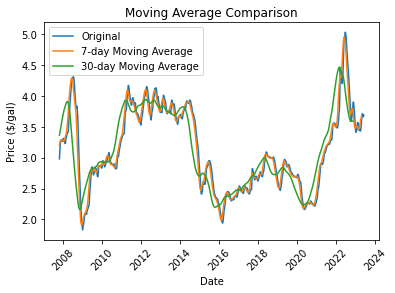

In [27]:
# Calculate the 7-day and 30-day moving averages for a specific location
column_name = 'New York State Average ($/gal)'
moving_average_7d = df[column_name].rolling(window=7).mean()
moving_average_30d = df[column_name].rolling(window=30).mean()

# Plot the line chart of the moving averages
plt.plot(df.index, df[column_name], label='Original')
plt.plot(df.index, moving_average_7d, label='7-day Moving Average')
plt.plot(df.index, moving_average_30d, label='30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($/gal)')
plt.title('Moving Average Comparison')
plt.legend()
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/MovingAvgComparison.jpg")

plt.show()

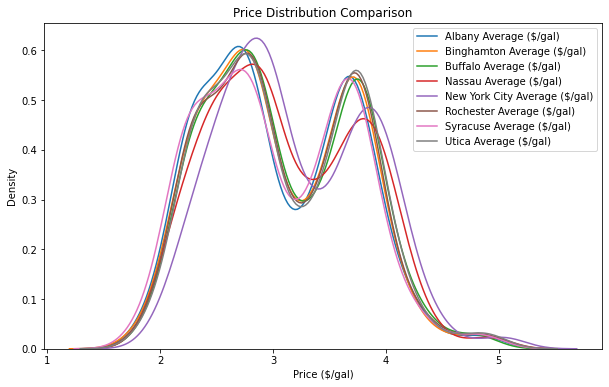

In [28]:
# Plot the kernel density estimation (KDE) plot to compare the price distributions for each location
plt.figure(figsize=(10, 6))
for column in df.columns[1:-2]:
    sns.kdeplot(df[column], label=column)

plt.xlabel('Price ($/gal)')
plt.ylabel('Density')
plt.title('Price Distribution Comparison')
plt.legend()

# Save the figure.
plt.savefig("./Images/PriceDistributionComparison.jpg")

plt.show()


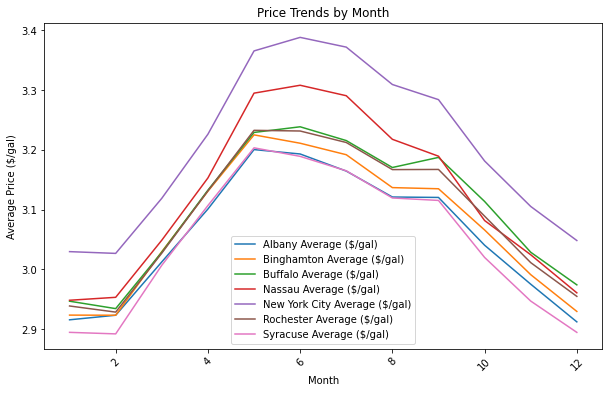

In [29]:
# Calculate the average price for each month and location
monthly_avg = df.groupby(['Month']).mean()

# Plot the price trend for each location by month
plt.figure(figsize=(10, 6))
for column in df.columns[1:-3]:
    plt.plot(monthly_avg.index, monthly_avg[column], label=column)

plt.xlabel('Month')
plt.ylabel('Average Price ($/gal)')
plt.title('Price Trends by Month')
plt.legend()
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/PriceTrendMonth.jpg")

plt.show()


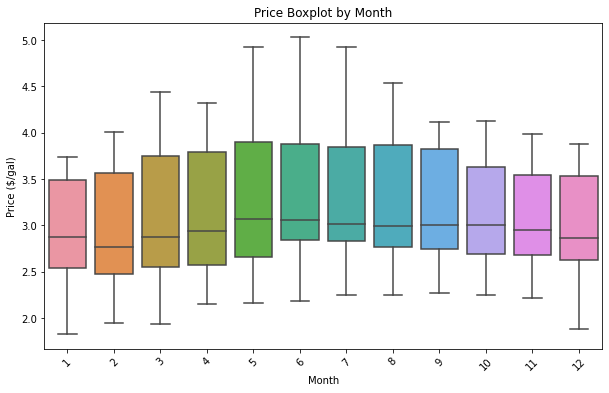

In [30]:
# Create a boxplot to compare the price distribution for each month
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Month'], y=df['New York State Average ($/gal)'])
plt.xlabel('Month')
plt.ylabel('Price ($/gal)')
plt.title('Price Boxplot by Month')
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/BoxplotMonth.jpg")

plt.show()

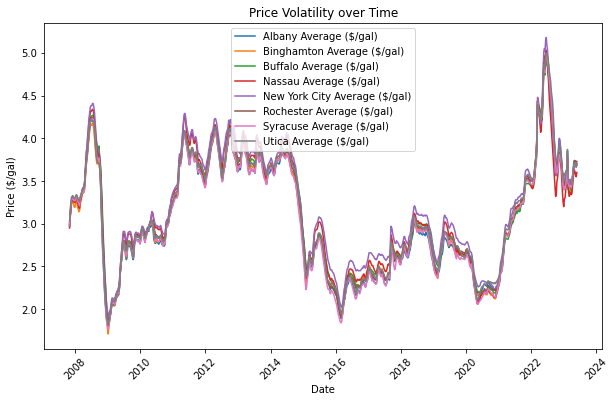

In [31]:
# Calculate the price volatility as the difference between the maximum and minimum prices for each location
price_volatility = df.iloc[:, 1:-2].max() - df.iloc[:, 1:-2].min()

# Plot the line chart of price volatility over time for each location
plt.figure(figsize=(10, 6))
for column in price_volatility.index:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Price ($/gal)')
plt.title('Price Volatility over Time')
plt.legend()
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/PriceVolatilityTime.jpg")

plt.show()

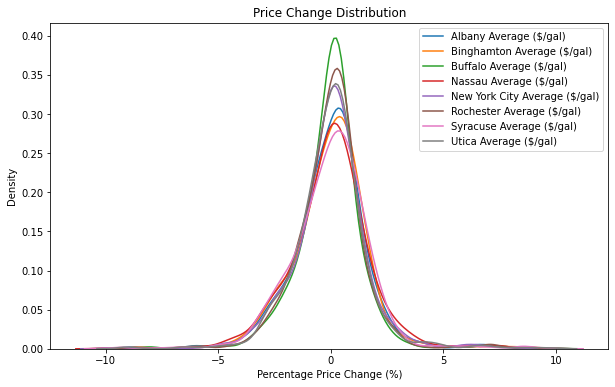

In [32]:
# Calculate the percentage price change for each location
price_change_pct = df.iloc[:, 1:-2].pct_change() * 100

# Plot the kernel density estimation (KDE) plot of price change distribution for each location
plt.figure(figsize=(10, 6))
for column in price_change_pct.columns:
    sns.kdeplot(price_change_pct[column].dropna(), label=column)

plt.xlabel('Percentage Price Change (%)')
plt.ylabel('Density')
plt.title('Price Change Distribution')
plt.legend()

# Save the figure.
plt.savefig("./Images/PriceChangeDistribution.jpg")

plt.show()

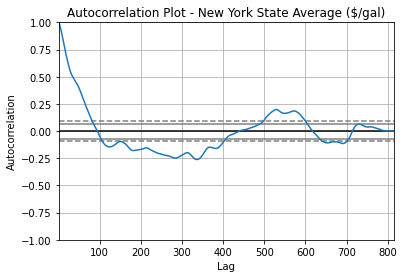

In [33]:
from pandas.plotting import autocorrelation_plot

# Plot the autocorrelation plot for a specific location (e.g., 'New York State Average ($/gal)')
column_name = 'New York State Average ($/gal)'
autocorrelation_plot(df[column_name])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title(f'Autocorrelation Plot - {column_name}')

# Save the figure.
plt.savefig("./Images/Autocorrelation.jpg")

plt.show()

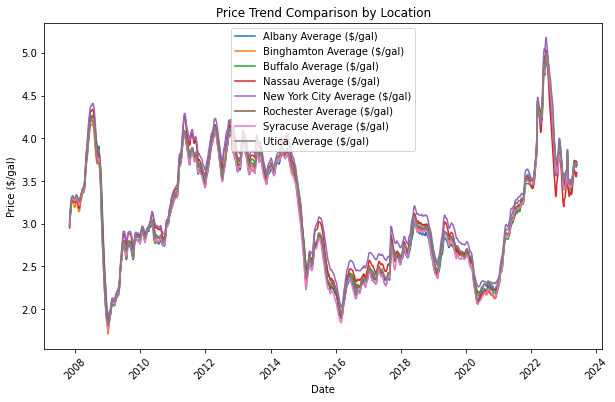

In [34]:
# Plot the line chart of price trends for each location
plt.figure(figsize=(10, 6))
for column in df.columns[1:-2]:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Price ($/gal)')
plt.title('Price Trend Comparison by Location')
plt.legend()
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/PriceTrendomparisonLocation.jpg")

plt.show()

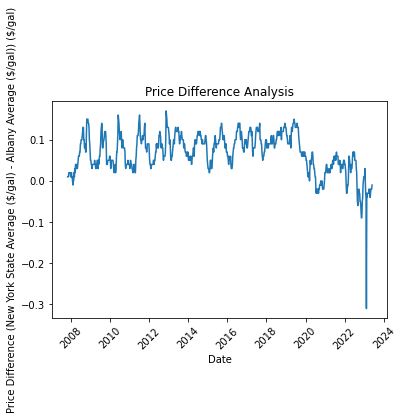

In [35]:
# Calculate the price difference between two locations (e.g., 'New York State Average ($/gal)' and 'Albany Average ($/gal)')
location1 = 'New York State Average ($/gal)'
location2 = 'Albany Average ($/gal)'
price_diff = df[location1] - df[location2]

# Plot the line chart of price difference
plt.plot(df.index, price_diff)
plt.xlabel('Date')
plt.ylabel(f'Price Difference ({location1} - {location2}) ($/gal)')
plt.title('Price Difference Analysis')
plt.xticks(rotation=45)

# Save the figure.
plt.savefig("./Images/PriceDifferenceAnalysis.jpg")

plt.show()